# CS375 Assignment 2 Lab Report - Colorful Colorization
#### Group 6 

## Part 1: Task Generalization

In [1]:
%matplotlib inline 
import os
import numpy as np
import tensorflow as tf
import pymongo as pm
import gridfs
import cPickle
import scipy.signal as signal
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, trange
from assignment_utils import *

### Getting data from the database

In [2]:
from model_switcher import *

In [4]:
colorful_model = model_switcher(model_name = 'colorful_model',
                          data_name = 'cifar10',
                          loss_name = 'colorful_loss')

In [7]:
vars(colorful_model)

{'collname': 'colorful_model_colorful_loss',
 'data_name': 'cifar10',
 'dbname': 'cifar10',
 'exp_fn': <class experiments.cifar10 at 0x7f9f9cc419a8>,
 'exp_id': '',
 'layers': ['oh', 'hi'],
 'loss_fn': <function losses.colorful_loss>,
 'loss_name': 'colorful_loss',
 'model_fn': <function models.colorful_model>,
 'model_name': 'colorful_model',
 'test_id': ''}

In [9]:
coll = p_get_coll(vars(colorful_model)['collname'], vars(colorful_model)['dbname'])
print(coll)

coll.distinct('exp_id')

Collection(Database(MongoClient(host=['localhost:24444'], document_class=dict, tz_aware=False, connect=True), u'cifar10'), u'colorful_model_colorful_loss.files')


[u'experiment19']

### Plotting the training curve
To see the training curve for the experiment, we pull the training loss and plot it, along with a smoothed version of the training loss obtained by convolving the loss with a boxcar.

experiment19
experiment19


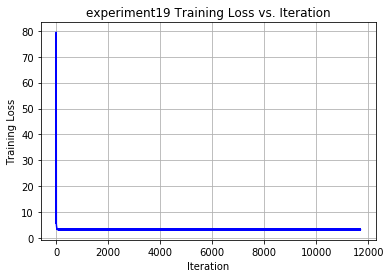

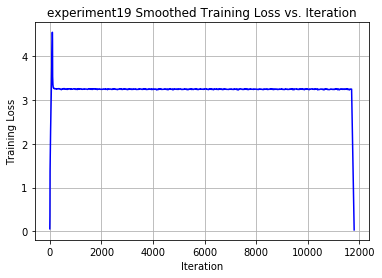

In [12]:
# TODO Double check this. Bit hacky

print(coll.distinct('exp_id')[-1])
texp_id = coll.distinct('exp_id')[-1]
print(texp_id)
p22_training(texp_id,coll)

### Plotting the validation results

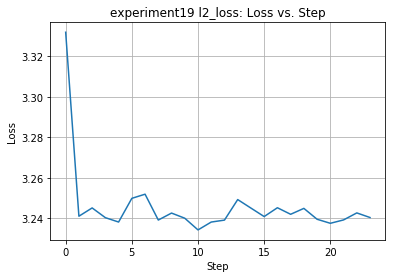

In [14]:
l2_loss, img_inputs, img_prediction = get_validation_data(texp_id, coll)
plot_l2_loss(l2_loss, texp_id)

np_inputs = np.array(img_inputs).transpose([0,2,3,4,1])
np_prediction = np.array(img_prediction).transpose([0,2,3,4,1])
my_shape = np_inputs.shape

In [15]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

In [16]:
def show_row(in_row, num_show = None):
    if num_show is None:
        num_show = len(in_row)
    fig = figure(figsize = [20, 6])
    for i in range(num_show):
        a = fig.add_subplot(1,num_show, i+1)
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
        imshow(in_row[:,:,:,i])

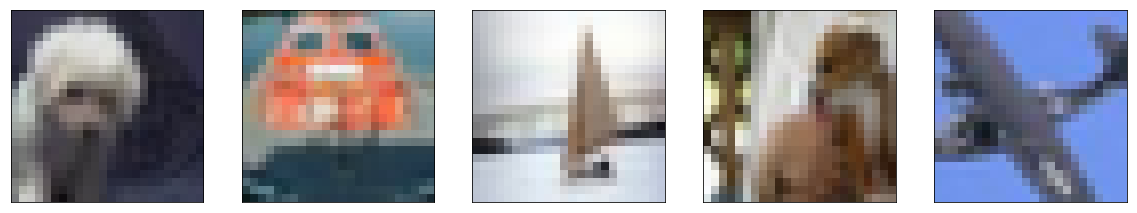

In [17]:
show_row(np_inputs[-1,:].squeeze(), 5)

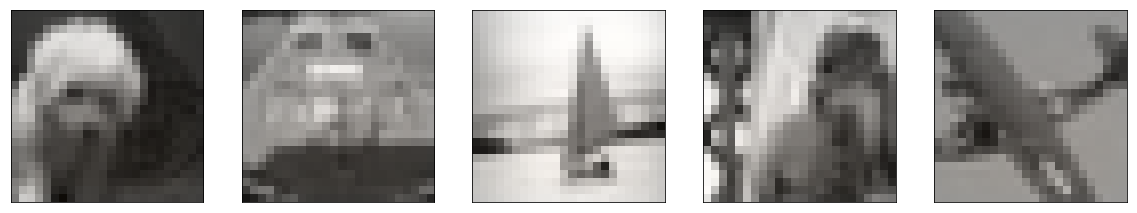

In [18]:
show_row(np_prediction[-1,:].squeeze(), 5)